In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

## insert Karnataka csv file
Karnataka agricultural dataset contains 3158 rows and 12 columns

In [2]:
Data = pd.read_csv(r"data\karnataka.csv")
Data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif


In [3]:
rows,columns = Data.shape
print(f"Karnataka Dataset contains {rows} rows and {columns} columns")

Karnataka Dataset contains 3158 rows and 12 columns


## convert dataset into dataframe

In [4]:
df = pd.DataFrame(Data)

In [5]:
df.describe(include='all')

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
count,3158.000000,3158,3155,3157,3157,3100,3156,3158,3156.000000,3156,3157.000000,3157
unique,NaN,11,157,23,107,27,3,163,NaN,13,NaN,3
top,NaN,Hassan,4,2903.1,27,Alluvial,Drip,187,NaN,Coconut,NaN,Rabi
freq,NaN,798,54,306,672,459,1310,60,NaN,1456,NaN,1742
mean,2009.929702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.581274,NaN,86532.987646,NaN
std,5.100895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.470190,NaN,94892.570873,NaN
min,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,637.000000,NaN
25%,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,2644.000000,NaN
50%,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,45186.000000,NaN
75%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,203317.000000,NaN


The results depicts that the most frequent location is Hassan, the most frequent crops is Coconut and Rabi is the most frequent season. 

## Handling Missing Values

### find and count the number of missing values in features

In [6]:
def describe_data(data):
    variables=[]
    missing_values=[]
    
    for item in data.columns:
        variables.append(item)
        missing_values.append(data[item].isna().sum())
    output = pd.DataFrame({
        "variables":variables,
        "missing values": missing_values
    })
    return output

In [7]:
describe_data(df)

,variables,missing values
0,Year,0
1,Location,0
2,Area,3
3,Rainfall,1
4,Temperature,1
5,Soil type,58
6,Irrigation,2
7,yeilds,0
8,Humidity,2
9,Crops,2


<Axes: >

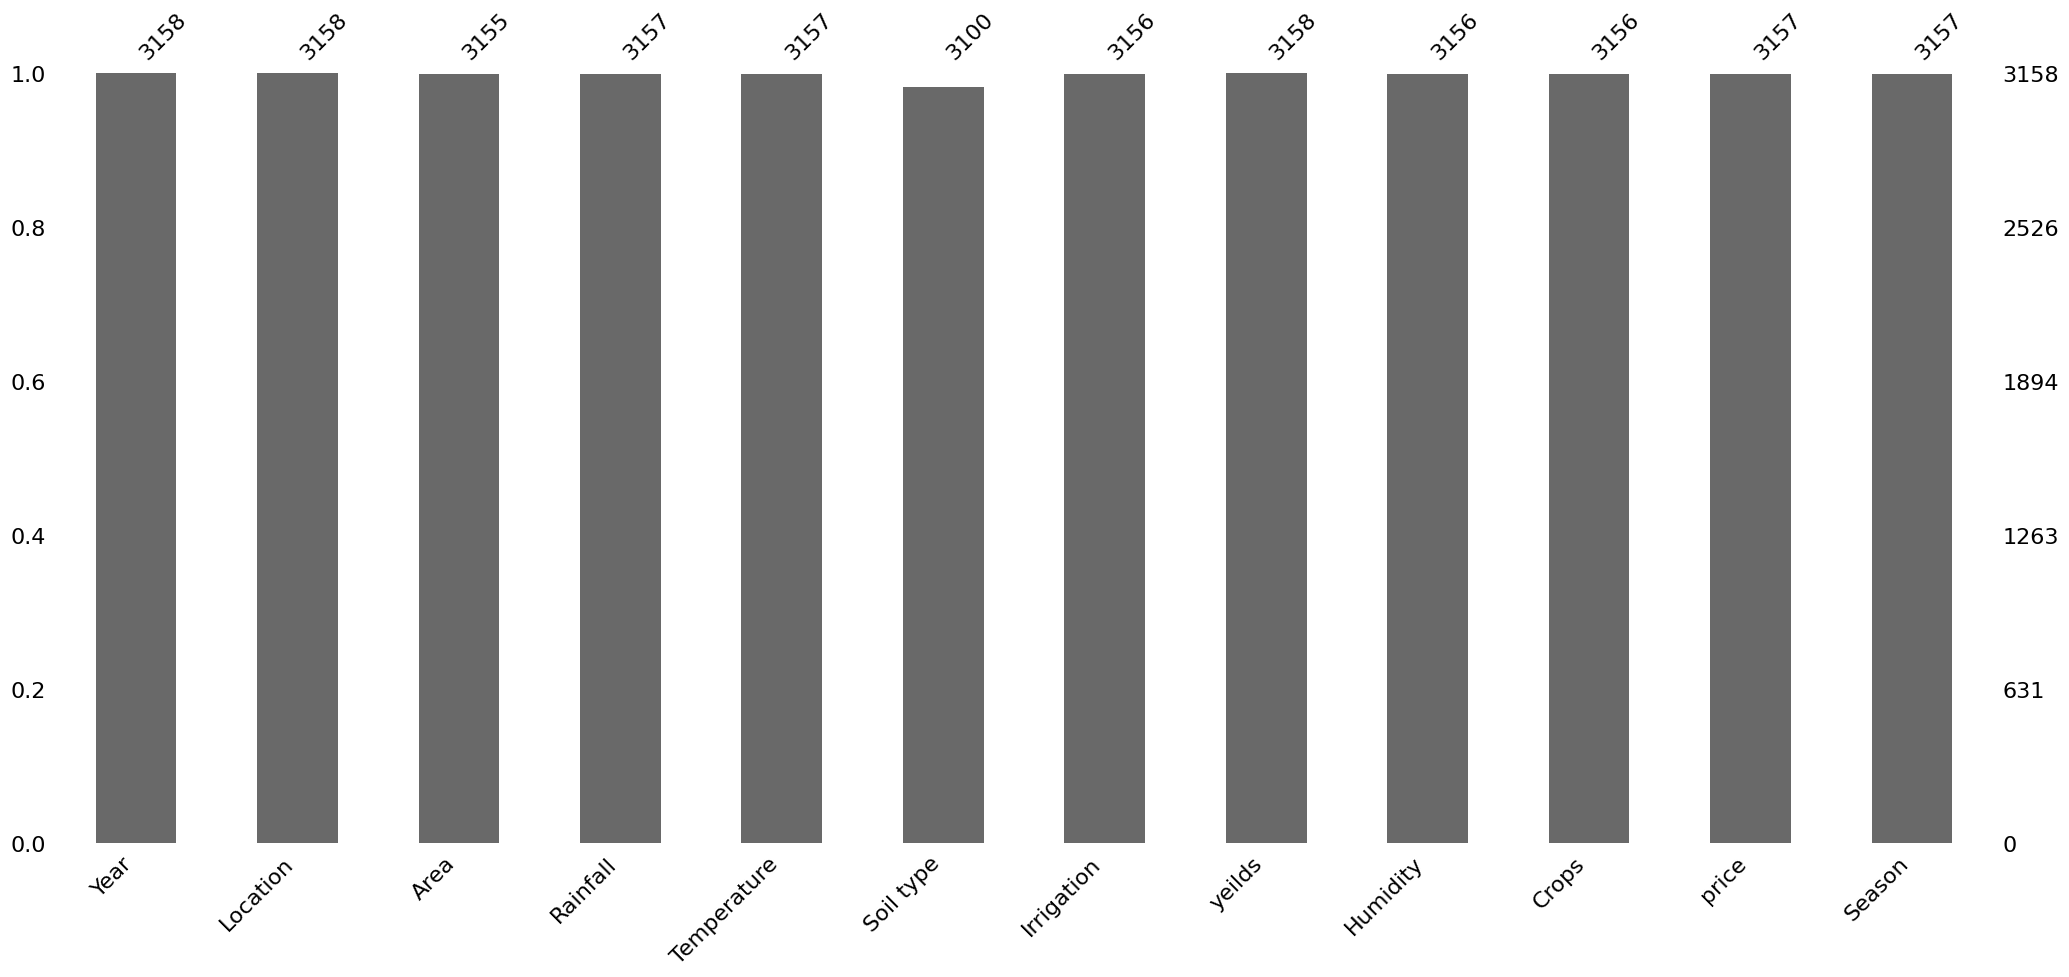

In [8]:
msno.bar(df)

### delete the missing values
In features such as: Season, Price, Crops, Humidity, Irrigation, Temperature, Rainfall, Area

In [17]:
df.dropna(subset=["Rainfall","Season","Temperature","price","Humidity", "Area","Irrigation","Soil type","Crops"],inplace=True)

# Handling Noise or Outliers

### Hardcode way: Find the number of unique values in the dataframe and  check all of them


In [ ]:
print(df.nunique())

Year            16
Location        11
Area           157
Rainfall        23
Temperature    107
Soil type       27
Irrigation       3
yeilds         163
Humidity        19
Crops           13
price           25
Season           3
dtype: int64


In [ ]:
for column in df.columns:
    print(f"Value counts for '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Value counts for 'Year':
2004    914
2017    222
2016    216
2015    192
2013    186
2014    186
2018    186
2012    144
2005    132
2011    132
2006    126
2007    126
2008    126
2009    126
2010    126
2019     18
Name: Year, dtype: int64
----------------------------------------
Value counts for 'Location':
Hassan           798
Gulbarga         504
Mangalore        342
Chikmangaluru    340
Madikeri         240
Kasaragodu       231
Raichur          231
Mysuru           222
Kodagu           192
Davangere         42
Bangalore         16
Name: Location, dtype: int64
----------------------------------------
Value counts for 'Area':
4      54
177    52
206    52
15     36
6      36
       ..
345     8
68      8
7       8
933     8
_       1
Name: Area, Length: 157, dtype: int64
----------------------------------------
Value counts for 'Rainfall':
2903.1    306
2996.6    305
3522.8    288
3729.8    208
3360      207
2746.2    206
3605.4    199
3654      196
3550      191
233       189
3512

### Missing values are not always represented as *NaN*. Checking the unique values of each column can reveal unexpected placeholders or hidden missing data. 
These are noises which can be seen in features as **?** or **_** values 

In [20]:
## replace the hidden placeholders such as ? and - with NaN
df.replace(['?', '_'], np.nan, inplace=True)
df.dropna(inplace=True)

In [23]:
# Count the number of rows with any missing values
rows_with_missing_values = df.isna().any(axis=1).sum()
total_rows = len(df)

# Percentage of rows with missing values
percentage_missing = (rows_with_missing_values / total_rows) * 100

print(f"Total numebr of rows: {total_rows}")
print(f"Number of rows with missing values: {rows_with_missing_values}")
print(f"Percentage of rows with missing values: {percentage_missing:.2f}%")

Total numebr of rows: 3084
Number of rows with missing values: 0
Percentage of rows with missing values: 0.00%


In [24]:
from IPython.display import display
missed_values_rows = df[df.isna().any(axis=1)]

# Show all the rows
pd.set_option('display.max_rows', None)
display(missed_values_rows)

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season


### Checking Temperature Feature Distribution

In [33]:
df['Temperature'].describe()

count    3084.000000
mean       42.571229
std        20.459438
min        26.800000
25%        27.000000
50%        38.000000
75%        43.000000
max       105.560000
Name: Temperature, dtype: float64

Text(0.5, 1.0, 'Density Plot ')

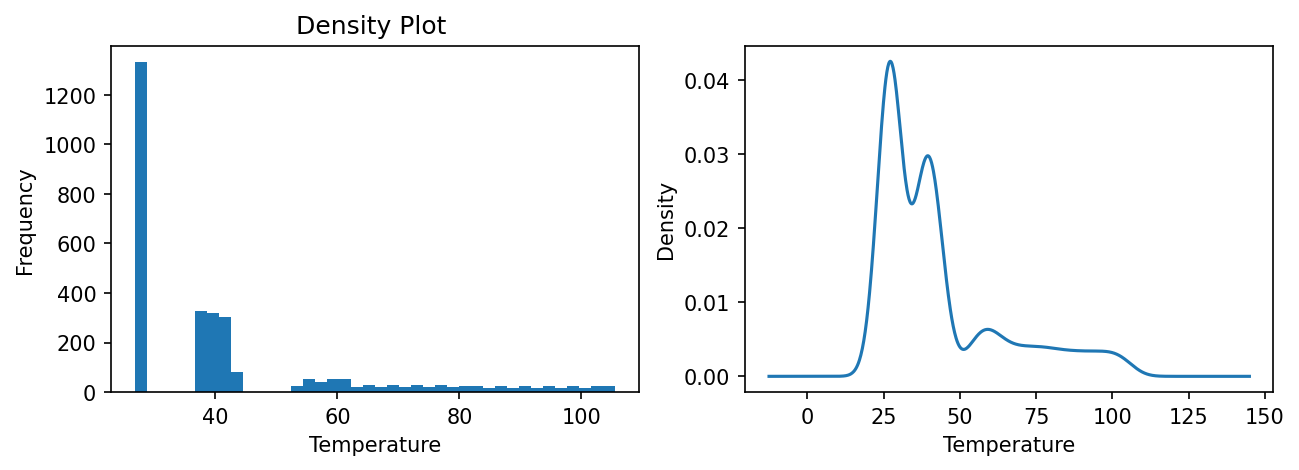

In [40]:
fig, axs=plt.subplots(1,2, figsize=(10,3),dpi=150)
axs[0].hist(df['Temperature'],bins=40)
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram")

df['Temperature'].plot(kind='density', ax=axs[1])
axs[1].set_xlabel("Temperature")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Density Plot ")


This plot depicts the density distribution in *Temperature* feature which means it needs preprocessing. 

There are two clusters of temperature, Celsius and Fahrenheit.

# Preprocessing
### converting all Temperature values to celsius

In [49]:
df['Temperature'] = df['Temperature'].astype(float)
mask = df['Temperature'] > 50
df.loc[mask, 'Temperature'] = (
    (df.loc[mask, 'Temperature'] - 32) * 5/9
)
df['Temperature'] = df['Temperature'].round(2)

Text(0.5, 1.0, 'Density Plot ')

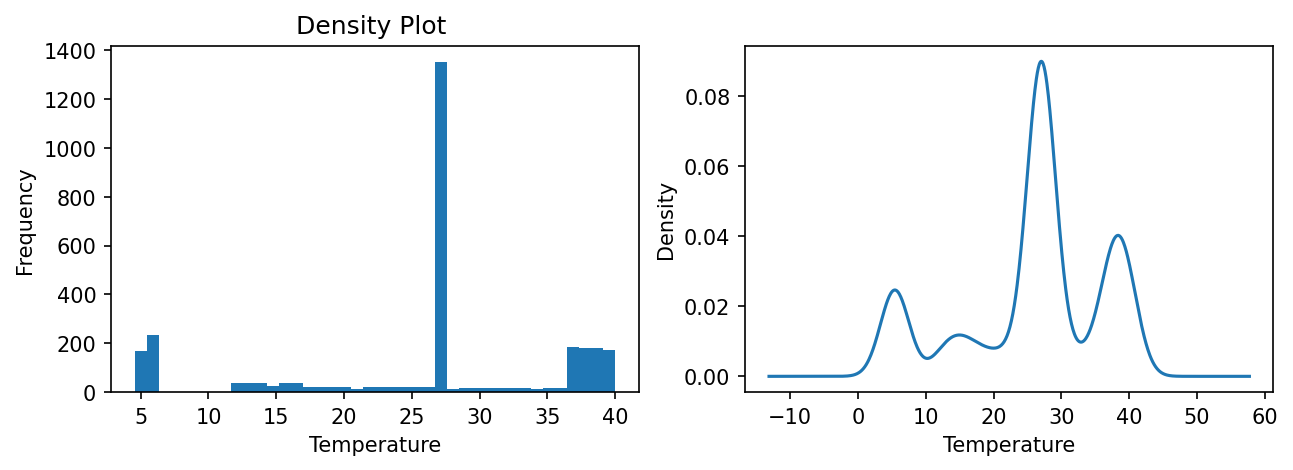

In [50]:
fig, axs=plt.subplots(1,2, figsize=(10,3),dpi=150)
axs[0].hist(df['Temperature'],bins=40)
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram")

df['Temperature'].plot(kind='density', ax=axs[1])
axs[1].set_xlabel("Temperature")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Density Plot ")


## Outliers in Rainfall and Price Feature

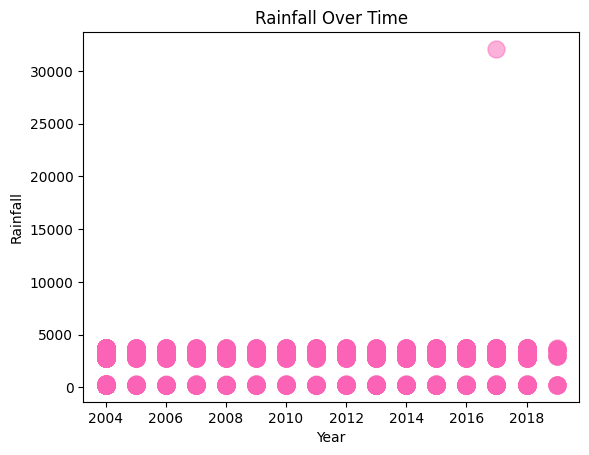

In [69]:
plt.figure()
plt.scatter(df['Year'], df['Rainfall'], s=150 , alpha=0.5, color='#FB64B6', marker='o')
plt.xlabel("Year")
plt.ylabel("Rainfall")
plt.title("Rainfall Over Time")
plt.show()

The outlier has been detected here and should be removed immediately 

In [70]:
df = df[df['Rainfall'] < 30000]

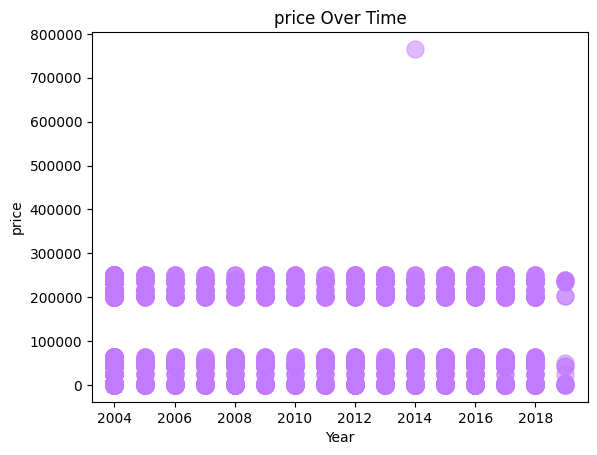

In [72]:
plt.figure()
plt.scatter(df['Year'], df['price'], s=150 , alpha=0.5, color='#C27AFF', marker='o')
plt.xlabel("Year")
plt.ylabel("price")
plt.title("price Over Time")
plt.show()

The outlier has been detected here and should be removed immediately 

In [73]:
df = df[df['Rainfall'] < 700000]